In [2]:
import pandas as pd
import os
import re

In [3]:
postings_path = "../Ml_Model_For_Similar_Jobs/postings.csv"

# Load the Job Postings CSV file into a Pandas DataFrame
postings_df = pd.read_csv(postings_path)

# Display the first few rows of the dataset to understand its structure
postings_df.head() 

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0


In [4]:
postings_df.shape

(123849, 31)

In [5]:
postings_df.head()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0


In [6]:
postings_sample_df = postings_df.sample(1000)
postings_sample_df.shape

(1000, 31)

In [7]:
postings_sample_df.head()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
38747,3898161328,Confidential,Material Handling Supervisor,Basic Job Functions:The Material Handling Shif...,125000.0,YEARLY,Louisville Metropolitan Area,2183652.0,4.0,NaN,...,NaN,1.713208e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,122500.0,NaN,NaN
101898,3905254577,"Westminster Canterbury Lynchburg, Inc.",Registered Medication Aide & CNA,"Westminster Canterbury of Lynchburg, a 5-Star ...",NaN,NaN,Greater Lynchburg Area,6844514.0,1.0,NaN,...,Valid VA State CNA license is required.Registe...,1.713469e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
88109,3904392530,Sono Bello,Lead Clinician RN/LPN,The Lead Clinician assists the Practice Manage...,NaN,NaN,"Raleigh, NC",585331.0,13.0,NaN,...,NaN,1.713395e+12,recruiting.ultipro.com,0,FULL_TIME,NaN,NaN,NaN,27601.0,37183.0
45270,3900955077,Process Insights,Group Controller,"Process Insights, Inc. (“PI”) is a fast growin...",NaN,NaN,"Houston, TX",28653676.0,17.0,NaN,...,NaN,1.713389e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,77002.0,48201.0
108269,3905337465,Azzur Group,Lead MES Engineer,As an MES Engineer at Azzur Group you will pla...,NaN,NaN,"Devens, MA",23279.0,5.0,NaN,...,NaN,1.713481e+12,app.jobvite.com,0,FULL_TIME,NaN,NaN,NaN,1434.0,NaN


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
def preprocess_text(text):
    """Preprocess text by converting to lowercase, removing special characters, and handling NaN."""
    if pd.isnull(text):
        return ""
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    return text.strip()

def combine_features(row):
    """Combine relevant features into a single string."""
    features = []
    for col in ['title', 'description', 'skills_desc']:
        if not pd.isnull(row[col]):
            features.append(f"{col.capitalize()}: {preprocess_text(row[col])}\n")
    return ' '.join(features)

# Apply preprocessing and feature combination
postings_sample_df['combined_features'] = postings_sample_df.apply(combine_features, axis=1)

# Display a sample of the combined data
postings_sample_df[['job_id', 'combined_features']].head()

,job_id,combined_features
38747,3898161328,Title: material handling supervisor\n Descript...
101898,3905254577,Title: registered medication aide cna\n Descr...
88109,3904392530,Title: lead clinician rnlpn\n Description: the...
45270,3900955077,Title: group controller\n Description: process...
108269,3905337465,Title: lead mes engineer\n Description: as an ...


In [11]:
print(postings_sample_df.iloc[0]['combined_features'])

Title: material handling supervisor
 Description: basic job functionsthe material handling shift supervisor is responsible for hiring and developing a new material handling team while implementing operational and commercial excellence this position will support our goal to take care of our customers by continually improving safety environmental efforts quality costs productivity and profitability job duties include but are not limited to cultivate an atmosphere aligned with a culture that promotes ownership and drives continuous improvement candidate must be able to prioritize personal and team development along with the demands of the production schedule and monthly shipping goals establish expectations and identify best practices that achieve results through empowering the team help develop strategic plan for material handling that includes procuring supplies and justification of capital expenditures
minimum qualificationsminimum 3 years experience in leading teamsminimum 3 years exp

In [15]:
import pandas as pd
resume_path = '../Ml_Model_For_Similar_Jobs/Resume.csv'

resume_df = pd.read_csv(resume_path)

# Display the first few rows of the dataset to understand its structure
resume_df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


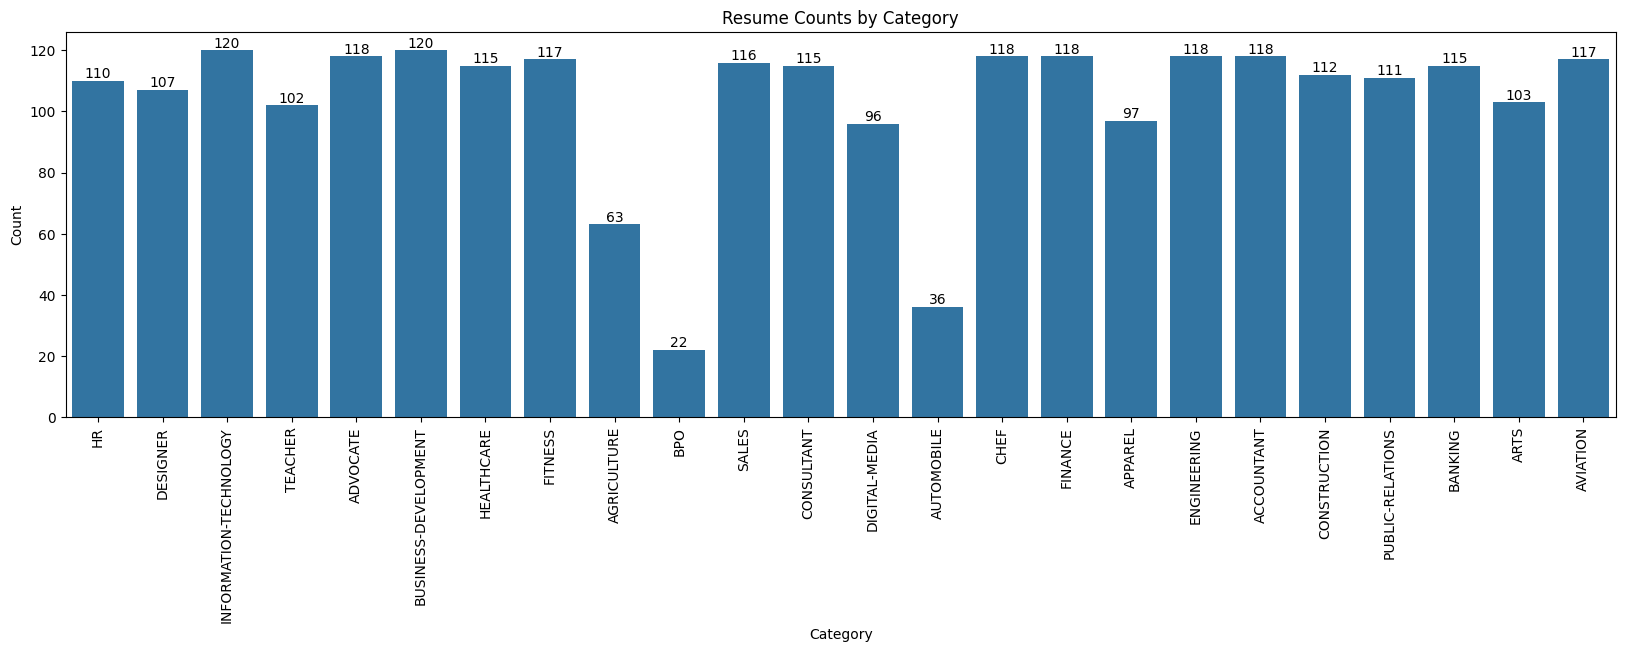

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size and rotation for x-ticks
plt.figure(figsize=(20, 5))
plt.xticks(rotation=90)

# Create a count plot
ax = sns.countplot(x="Category", data=resume_df)

# Annotate each bar with its height (the count value)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Add gridlines for clarity
plt.title("Resume Counts by Category")
plt.ylabel("Count")
plt.xlabel("Category")

# Show the plot
plt.show()

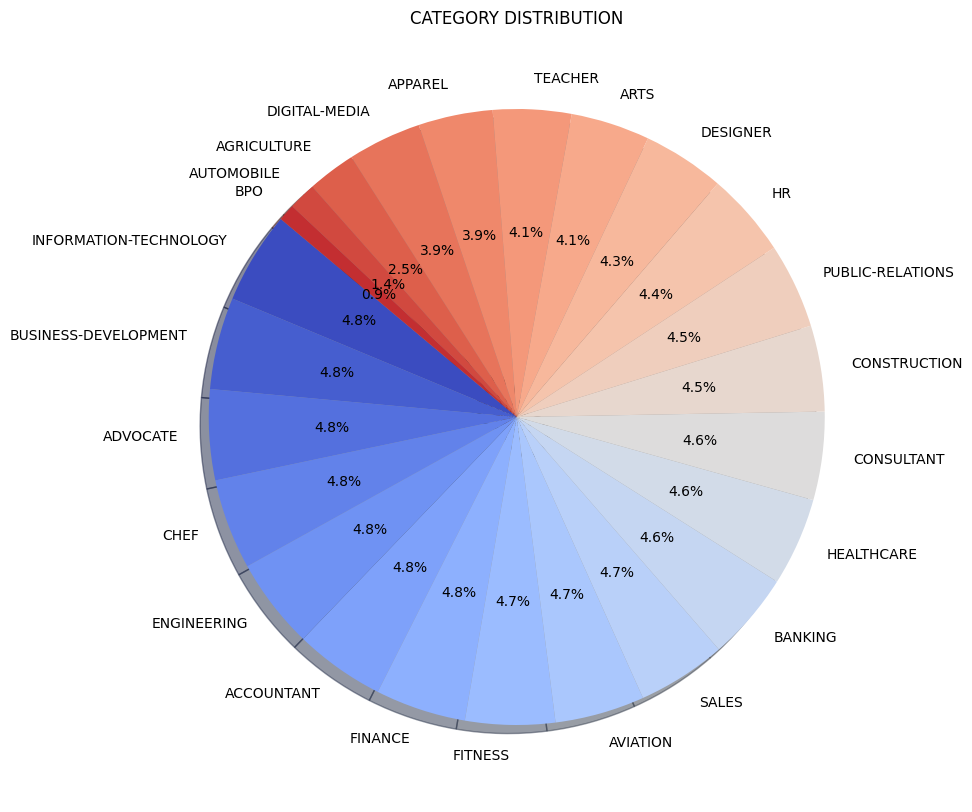

In [17]:
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

# Get category counts and labels
targetCounts = resume_df['Category'].value_counts()
targetLabels = targetCounts.index  # Ensures labels align with counts

# Create a figure
plt.figure(1, figsize=(22, 22))
the_grid = GridSpec(2, 2)

# Generate a colormap
cmap = plt.get_cmap('coolwarm')
colors = [cmap(i / len(targetCounts)) for i in range(len(targetCounts))]

# Plot the pie chart
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')
plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors, startangle=140)

# Show the plot
plt.show()

In [18]:
def preprocess_resume_text(row):
    """Preprocess resume text by converting to lowercase, removing special characters, and handling NaN."""
    text = row.get('Resume_str', '') 
    if pd.isnull(text):
        return ""
    text = re.sub(r'[^\w\s,+./-]', '', text)  # Remove unwanted characters but retain important ones like +, , . / -
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespaces
    text = text.strip()  # Trim leading/trailing whitespace
    text = text.lower() # Normalize to lowercase
    
    return text

# Apply preprocessing
resume_df['preprocessed_resume'] = resume_df.apply(preprocess_resume_text, axis=1)

# Display the first 5 rows
resume_df[['ID', 'preprocessed_resume']].head()

,ID,preprocessed_resume
0,16852973,hr administrator/marketing associate hr admini...
1,22323967,"hr specialist, us hr operations summary versat..."
2,33176873,hr director summary over 20 years experience i...
3,27018550,"hr specialist summary dedicated, driven, and d..."
4,17812897,hr manager skill highlights hr skills hr depar...


In [20]:
import nltk
from nltk.probability import FreqDist

In [22]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')
import pandas as pd
from PyPDF2 import PdfReader
from nltk import pos_tag, sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import string
import re
from tqdm import tqdm
from transformers import AutoModel, AutoTokenizer
import torch
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\avata\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\avata\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\avata\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
d:\CODING\Resume Enhancer\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\avata\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\avata\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\avata\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [24]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Download NLTK stopwords if not already downloaded
nltk.download("stopwords")
nltk.download("punkt")

def print_most_frequent_words(text, top_n=50):
    # Convert to lowercase
    text = text.lower()
    
    # Remove non-alphabetic characters (punctuation, numbers, special characters)
    text = re.sub(r"[^a-z\s]", "", text)
    
    # Tokenize words
    words = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    filtered_words = [word for word in words if word not in stop_words]
    
    # Get word frequency
    wordfreqdist = FreqDist(filtered_words)
    mostcommon = wordfreqdist.most_common(top_n)
    
    # Print results
    for word, freq in mostcommon:
        print(f"{word}: {freq}")

# Apply function to dataset
combined_text = " ".join(resume_df["preprocessed_resume"].astype(str))
print_most_frequent_words(combined_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\avata\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\avata\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


state: 16063
city: 15045
company: 14663
management: 11996
name: 11737
sales: 8124
skills: 7695
business: 7686
customer: 7607
new: 6336
service: 5994
team: 5871
development: 5648
experience: 5615
training: 5557
project: 5244
work: 4700
information: 4471
marketing: 4360
manager: 4309
financial: 4183
support: 4078
office: 4069
education: 4055
including: 4035
staff: 3901
professional: 3845
data: 3722
system: 3631
customers: 3513
systems: 3512
university: 3409
process: 3380
clients: 3373
managed: 3368
design: 3286
quality: 3238
developed: 3154
reports: 3065
analysis: 3016
operations: 2984
client: 2940
product: 2900
program: 2874
microsoft: 2807
services: 2791
accounting: 2778
current: 2775
accounts: 2753
responsible: 2714


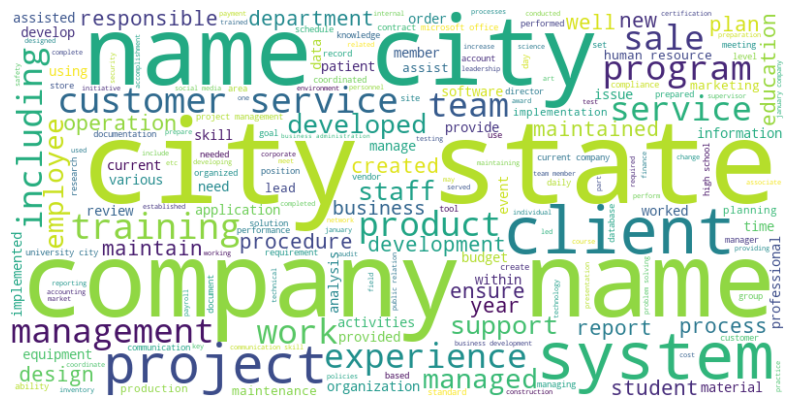

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [27]:
print(resume_df.iloc[0]['preprocessed_resume'])

hr administrator/marketing associate hr administrator summary dedicated customer service manager with 15+ years of experience in hospitality and customer service management. respected builder and leader of customer-focused teams strives to instill a shared, enthusiastic commitment to customer service. highlights focused on customer satisfaction team management marketing savvy conflict resolution techniques training and development skilled multi-tasker client relations specialist accomplishments missouri dot supervisor training certification certified by ihg in customer loyalty and marketing by segment hilton worldwide general manager training certification accomplished trainer for cross server hospitality systems such as hilton onq , micros opera pms , fidelio opera reservation system ors , holidex completed courses and seminars in customer service, sales strategies, inventory control, loss prevention, safety, time management, leadership and performance assessment. experience hr admini

In [28]:
resume_df[resume_df['Category'] == 'ENGINEERING']

,ID,Resume_str,Resume_html,Category,preprocessed_resume
1690,14206561,ENGINEERING TECHNICIAN High...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING,engineering technician highlights pc operating...
1691,15139979,ENGINEERING ASSISTANT Summary ...,"<div class=""RNA skn-cnt4 fontsize fontface vma...",ENGINEERING,engineering assistant summary knowledgeable en...
1692,44624796,ENGINEERING MANAGER Profile ...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING,engineering manager profile dedicated engineer...
1693,54227873,ENGINEERING INTERN Profession...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING,engineering intern professional summary a comp...
1694,28005884,ENGINEERING TECHNICIAN Summar...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING,engineering technician summary to obtain a pos...
...,...,...,...,...,...
1803,31694970,INDUSTRIAL ENGINEERING INTERN P...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING,industrial engineering intern profile outstand...
1804,33685075,"MANAGER, QUALITY ENGINEERING ...","<div class=""fontsize fontface vmargins hmargin...",ENGINEERING,"manager, quality engineering executive summary..."
1805,77828437,MECHANICAL DESIGN ENGINEERING INTERN ...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING,mechanical design engineering intern summary t...
1806,35172961,PROCESS ENGINEERING INTERN ...,"<div class=""fontsize fontface vmargins hmargin...",ENGINEERING,process engineering intern profile phd cleanro...


In [29]:
%pip install sentence-transformers scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [30]:
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np
from tqdm import tqdm

# Load the pre-trained SentenceTransformer model
model = SentenceTransformer('all-MiniLM-L6-v2')  # You can choose a different model if needed

# Function to generate embeddings in batches
def generate_embeddings_in_batches(df, column_name, batch_size=32):
    embeddings = []
    # Iterate over the dataframe in batches
    for i in tqdm(range(0, len(df), batch_size), desc="Generating Embeddings"):
        batch_texts = df[column_name].iloc[i:i + batch_size].tolist()
        
        try:
            # Generate embeddings for the batch of texts
            batch_embeddings = model.encode(batch_texts, show_progress_bar=False)
            embeddings.append(batch_embeddings)
        except Exception as e:
            print(f"Error occurred during embedding generation: {e}")
            embeddings.append([np.nan] * len(batch_texts))  # In case of error, append NaN embeddings
    
    # Flatten the list of embeddings and return
    return np.vstack(embeddings)

# Assuming you have 'postings_sample_df' with 'combined_features' column
# Generate embeddings for the 'combined_features' column
postings_sample_df['embeddings'] = list(generate_embeddings_in_batches(postings_sample_df, 'combined_features'))

# Display the first few rows of the DataFrame with embeddings
print(postings_sample_df[['job_id', 'embeddings']].head())


Generating Embeddings: 100%|██████████| 32/32 [00:32<00:00,  1.00s/it]

            job_id                                         embeddings
38747   3898161328  [-0.03631653, -0.037722304, 0.061222013, 0.076...
101898  3905254577  [-0.049932092, -0.040343855, -0.048937, -0.026...
88109   3904392530  [-0.08909628, -0.044662576, -0.06185259, -0.04...
45270   3900955077  [-0.06835848, -0.04955575, -0.10621566, -0.001...
108269  3905337465  [-0.06154701, 0.004493411, -0.02267967, -0.004...


In [31]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity


# Function to generate embeddings for resumes
def generate_resume_embeddings(df, column_name, batch_size=32):
    embeddings = []
    for i in tqdm(range(0, len(df), batch_size), desc="Generating Resume Embeddings"):
        batch_texts = df[column_name].iloc[i:i + batch_size].tolist()
        
        try:
            # Generate embeddings for the batch of texts
            batch_embeddings = model.encode(batch_texts, show_progress_bar=False)
            embeddings.append(batch_embeddings)
        except Exception as e:
            print(f"Error occurred during embedding generation: {e}")
            embeddings.append([np.nan] * len(batch_texts))
    
    return np.vstack(embeddings)

# Ensure embeddings are valid and properly shaped
def validate_embeddings(embeddings):
    embeddings = np.array(embeddings, dtype=object)
    
    # Check if all embeddings are lists of the same length
    embedding_lengths = [len(embedding) if isinstance(embedding, (list, np.ndarray)) else 0 for embedding in embeddings]
    
    if len(set(embedding_lengths)) != 1:
        raise ValueError("All embeddings should have the same length. Found embeddings with differing lengths.")
    
    embeddings = np.array(embeddings.tolist(), dtype=np.float32)
    
    if embeddings.ndim != 2 or np.any(np.isnan(embeddings)) or np.any(np.isinf(embeddings)):
        print("Invalid embeddings found. Here are some problematic entries:")
        invalid_indices = np.where(np.isnan(embeddings) | np.isinf(embeddings))[0]
        print(embeddings[invalid_indices])
        
        embeddings = embeddings[~np.isnan(embeddings).any(axis=1)]
        embeddings = embeddings[~np.isinf(embeddings).any(axis=1)]
        
        if embeddings.ndim != 2:
            raise ValueError("Embeddings are not 2D after cleaning. Please check the input data.")
    
    return embeddings

# Generate embeddings for the 'preprocessed_resume' column in resume_df
resume_df['resume_embeddings'] = list(generate_resume_embeddings(resume_df, 'preprocessed_resume'))

# Ensure that resume embeddings are in 2D array format
resume_embeddings = validate_embeddings(resume_df['resume_embeddings'].tolist())

# Now, let's check and clean job postings embeddings if necessary
postings_sample_embeddings = postings_sample_df['embeddings'].to_numpy()

# Ensure job postings embeddings are numeric and validate them
job_postings_embeddings = validate_embeddings(postings_sample_embeddings)

# Function to find the top 5 job matches for a specific resume based on cosine similarity
def get_top_matches_for_resume(resume_id, resume_df, job_postings_embeddings, top_n=5):
    # Check if the provided resume ID exists in the dataframe
    if resume_id not in resume_df['ID'].values:
        raise ValueError(f"Resume ID {resume_id} not found in dataset.")
    
    # Extract the resume embedding for the given ID
    resume_embedding = resume_df.loc[resume_df['ID'] == resume_id, 'resume_embeddings'].values[0]
    
    # Ensure the embedding is a proper NumPy array
    resume_embedding = np.array(resume_embedding, dtype=np.float32).reshape(1, -1)

    # Calculate cosine similarity between the selected resume and all job postings
    cosine_sim = cosine_similarity(resume_embedding, job_postings_embeddings)

    # Get indices of the top N job postings with the highest similarity
    top_indices = np.argsort(cosine_sim[0])[::-1][:top_n]

    # Get corresponding job titles, descriptions, similarities, and job IDs
    top_job_titles = postings_sample_df['title'].iloc[top_indices].values
    top_job_descriptions = postings_sample_df['description'].iloc[top_indices].values
    top_similarities = cosine_sim[0][top_indices]
    top_job_ids = postings_sample_df['job_id'].iloc[top_indices].values

    # Store results in a list of tuples
    matches = list(zip(top_job_titles, top_job_ids, top_job_descriptions, top_similarities))

    return matches

# Example Usage:
resume_id = 14206561  # Change this to 31 or any other ID to get different results
top_matches = get_top_matches_for_resume(resume_id, resume_df, job_postings_embeddings, top_n=5)

# Display the results
print(f"Top 5 job matches for Resume ID {resume_id}:")
for i, match in enumerate(top_matches, start=1):
    title, job_id, description, similarity = match
    print(f"{i}. {title} (Job ID: {job_id}) - Similarity: {similarity:.4f}")


Generating Resume Embeddings: 100%|██████████| 78/78 [01:29<00:00,  1.14s/it]

Top 5 job matches for Resume ID 14206561:
1. Datacenter Technician (Job ID: 3898169113) - Similarity: 0.6012
2. Engineering - Engineering Technician Engineering Technician (Job ID: 3900090989) - Similarity: 0.5993
3. Maintenance Technician (Job ID: 3902759157) - Similarity: 0.5752
4. Senior Facilities Technician (Job ID: 3902740758) - Similarity: 0.5632
5. Maintenance Technician I Indirect Truss Shop (Job ID: 3906235542) - Similarity: 0.5620


In [ ]:
import numpy as np
import PyPDF2
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Load the embedding model (make sure it's the same as the one used for existing resumes)
model = SentenceTransformer("all-MiniLM-L6-v2")

# Function to generate embeddings for resumes
def generate_resume_embeddings(df, column_name, batch_size=32):
    embeddings = []
    for i in tqdm(range(0, len(df), batch_size), desc="Generating Resume Embeddings"):
        batch_texts = df[column_name].iloc[i:i + batch_size].tolist()
        
        try:
            # Generate embeddings for the batch of texts
            batch_embeddings = model.encode(batch_texts, show_progress_bar=False)
            embeddings.append(batch_embeddings)
        except Exception as e:
            print(f"Error occurred during embedding generation: {e}")
            embeddings.append([np.nan] * len(batch_texts))
    
    return np.vstack(embeddings)

# Ensure embeddings are valid and properly shaped
def validate_embeddings(embeddings):
    embeddings = np.array(embeddings, dtype=object)
    
    # Check if all embeddings are lists of the same length
    embedding_lengths = [len(embedding) if isinstance(embedding, (list, np.ndarray)) else 0 for embedding in embeddings]
    
    if len(set(embedding_lengths)) != 1:
        raise ValueError("All embeddings should have the same length. Found embeddings with differing lengths.")
    
    embeddings = np.array(embeddings.tolist(), dtype=np.float32)
    
    if embeddings.ndim != 2 or np.any(np.isnan(embeddings)) or np.any(np.isinf(embeddings)):
        print("Invalid embeddings found. Here are some problematic entries:")
        invalid_indices = np.where(np.isnan(embeddings) | np.isinf(embeddings))[0]
        print(embeddings[invalid_indices])
        
        embeddings = embeddings[~np.isnan(embeddings).any(axis=1)]
        embeddings = embeddings[~np.isinf(embeddings).any(axis=1)]
        
        if embeddings.ndim != 2:
            raise ValueError("Embeddings are not 2D after cleaning. Please check the input data.")
    
    return embeddings

# Generate embeddings for the 'preprocessed_resume' column in resume_df
resume_df['resume_embeddings'] = list(generate_resume_embeddings(resume_df, 'preprocessed_resume'))

# Ensure that resume embeddings are in 2D array format
resume_embeddings = validate_embeddings(resume_df['resume_embeddings'].tolist())

# Now, let's check and clean job postings embeddings if necessary
postings_sample_embeddings = postings_sample_df['embeddings'].to_numpy()

# Ensure job postings embeddings are numeric and validate them
job_postings_embeddings = validate_embeddings(postings_sample_embeddings)

# Function to extract text from a PDF resume
def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, "rb") as file:
        pdf_reader = PyPDF2.PdfReader(file)
        for page in pdf_reader.pages:
            text += page.extract_text() + "\n"
    return text.strip()

# Function to get the top 5 job matches for a custom resume
def get_top_matches_for_custom_resume(pdf_path, job_postings_embeddings, postings_sample_df, top_n=5):
    # Extract text from the uploaded PDF
    resume_text = extract_text_from_pdf(pdf_path)
    
    if not resume_text:
        raise ValueError("No text found in the uploaded PDF. Please provide a valid resume.")

    # Generate an embedding for the extracted resume text
    resume_embedding = model.encode([resume_text], show_progress_bar=False)

    # Compute cosine similarity between the new resume and job postings
    cosine_sim = cosine_similarity(resume_embedding, job_postings_embeddings)

    # Get indices of the top N job postings with the highest similarity
    top_indices = np.argsort(cosine_sim[0])[::-1][:top_n]

    # Get corresponding job details
    top_job_titles = postings_sample_df['title'].iloc[top_indices].values
    top_job_descriptions = postings_sample_df['description'].iloc[top_indices].values
    top_similarities = cosine_sim[0][top_indices]
    top_job_ids = postings_sample_df['job_id'].iloc[top_indices].values

    # Store results in a list of tuples
    matches = list(zip(top_job_titles, top_job_ids, top_job_descriptions, top_similarities))

    return matches

# Example Usage:
pdf_path = "../Ml_Model_For_Similar_Jobs/VISHALRESUME-1.pdf"  # Replace with the actual PDF file path
top_matches = get_top_matches_for_custom_resume(pdf_path, job_postings_embeddings, postings_sample_df, top_n=5)

# Display the results
print(f"Top 5 job matches for the uploaded resume:")
for i, match in enumerate(top_matches, start=1):
    title, job_id, description, similarity = match
    print(f"{i}. {title} (Job ID: {job_id}) ")


Generating Resume Embeddings: 100%|██████████| 78/78 [01:18<00:00,  1.00s/it]


Top 5 job matches for the uploaded resume:
1. Senior Full Stack Software Engineer (Job ID: 3904408172) - Similarity: 0.5785
2. SAS Developer (Job ID: 3902364752) - Similarity: 0.5616
3. Senior Business Intelligence Developer (Job ID: 3901957626) - Similarity: 0.5270
4. Applications Development Technical Lead Analyst (Job ID: 3903474996) - Similarity: 0.5200
5. Senior Data Engineer (Job ID: 3901607925) - Similarity: 0.5173
